In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

import torch
import torch.nn as nn
from agents import AgentA2C
from model_trainer import AgentTrainer

In [6]:
env = gym.make("CartPole-v0")
if hasattr(env, '_max_episode_steps'):
    env = env.env

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape

# plt.imshow(env.render("rgb_array"))

In [8]:
env.reset()

array([ 0.00546239, -0.01957914, -0.02060954,  0.00747748], dtype=float32)

In [7]:
env.step(0)

(array([ 0.01084108, -0.23920938, -0.00615039,  0.31390786], dtype=float32),
 1.0,
 False,
 {})

In [1]:
def results(env,trainer,epochs=100,sessions_per_epoch=100,winning_condition=200,max_session_size=1000):
    mean_rewards = []
    actor_hist,critic_hist = [[],[]]
    for i in range(epochs):
        hist = np.array([trainer.train(*trainer.generate_session(env)) for _ in range(sessions_per_epoch)])
        mean_rewards.append(np.mean(hist[:,0].tolist()))
        actor_hist.append(np.mean(hist[:,1].tolist()))
        if trainer.agent.name == "a2c":
            critic_hist.append(np.mean(hist[:,2].tolist()))
        plt.figure(figsize=(22,5))
        plt.subplot(121)
        plt.plot(range(len(mean_rewards)),mean_rewards,label=trainer.agent.name,color='blueviolet')
        plt.legend(loc=0)
        plt.grid(True)
        plt.subplot(122)
        plt.plot(range(len(actor_hist)),actor_hist,label="actor loss",color='blueviolet')
        if trainer.agent.name == "a2c":
            plt.plot(range(len(critic_hist)),critic_hist,label="critic loss",color='salmon')
        plt.legend(loc=0)
        plt.grid(True)
        clear_output(True)
        print(f"Epoch: {i+1} | Average reward: {mean_rewards[i]:.3f}")

        plt.show()
    return mean_rewards

In [40]:
params = {
    "state_dim":state_dim[0],
    "n_actions":n_actions,
    "epochs":50,
    "sessions_per_epoch":100,
    "winning_condition":1,
    "max_session_size":1000
}

model = AgentA2C(state_dim[0],n_actions)
trainer = AgentTrainer(
    model,
    env,
    params["n_actions"],
    params["state_dim"],
    0.99,
    1e-2,
    1.0,
    torch.nn.MSELoss(),
    torch.optim.Adam,
    params["max_session_size"])

Epoch: 48 | Average reward: -1000.000


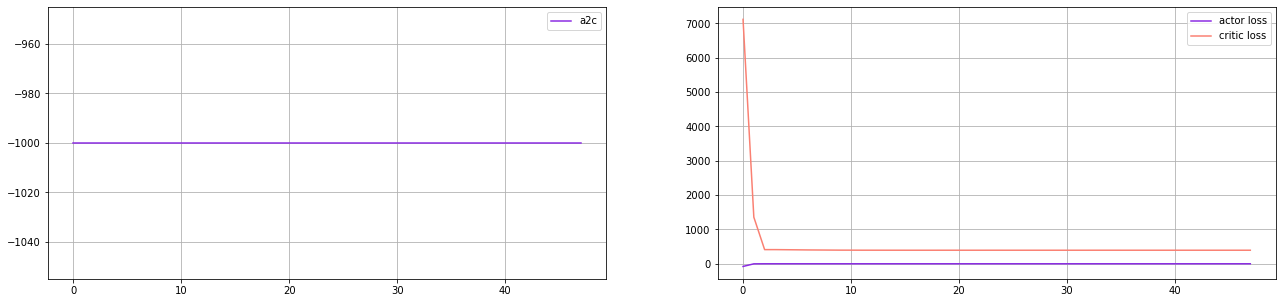

In [ ]:
mean_rewards_a2c = results(env,trainer,params["epochs"],params["sessions_per_epoch"],params["winning_condition"],params["max_session_size"])

Epoch: 50 | Average reward: 166.567


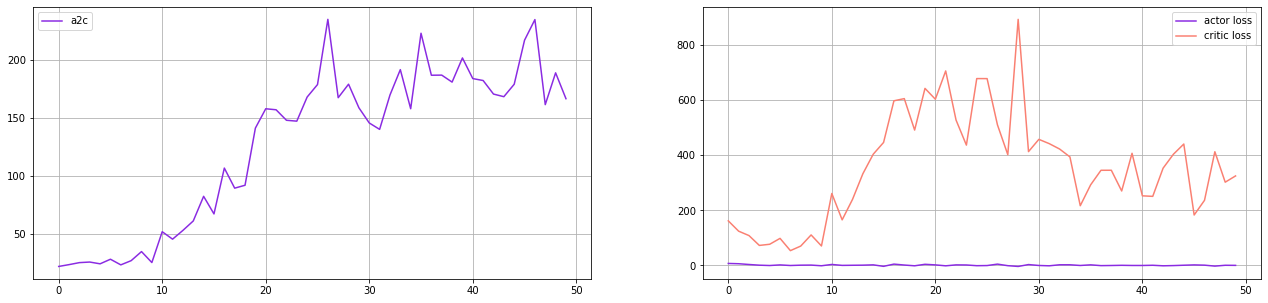

In [5]:
mean_rewards_a2c = results(env,trainer,params["epochs"],params["sessions_per_epoch"],params["winning_condition"],params["max_session_size"])